# Load and prepare Data

Initially, we import the gold standard into a dataframe and seperate the annotations provided by human annotators from the potenitally antisemetic tweets. The tweets will undergo annotation by the LLM later in our experiment, while the human annotations will provide the benchmark against which the LLM's annotations will be evaluated.

In [18]:
import pandas as pd
path = "../input/data/Updated_dataset_with_full_text/Updated_dataset_with_full_text.csv"
df = pd.read_csv(path)

df

,TweetID,Username,CreateDate,Biased,Keyword,Text
0,1232258532273090560,amit2nirvana,2020-02-25 10:58:23+00:00,0,Israel,The last 24 hours in Israel: https://t.co/0YNw...
1,1224025761092448257,NinjaAlex420,2020-02-02 17:44:17+00:00,0,Israel,@stranahan KnowMoreNews isn't confident enough...
2,1242382710561107969,SevenShepherd,2020-03-24 09:28:15+00:00,0,Israel,"""[Even] an heritage unto Israel his servant: f..."
3,1224677205306818561,MGSheikh8,2020-02-04 12:52:53+00:00,0,Israel,Opinion: No One in Israel Knew They Were Commi...
4,1214278369338109953,elianebis1,2020-01-06 20:11:38+00:00,0,Israel,https://t.co/LTB0zidzM9 When #TheCloudOfGod ap...
...,...,...,...,...,...,...
6936,1255850426899013632,TAG73957257,2020-04-30 13:24:09+00:00,1,ZioNazi,@JackieKane I'd never go back. ZioNazi managem...
6937,1234276923213303812,totalsatire,2020-03-02 00:38:44+00:00,1,ZioNazi,@JulianRoepcke The lovely Zionazi Djihad Julia...
6938,1240883925096030208,Futatimbo,2020-03-20 06:12:36+00:00,1,ZioNazi,@IvankaTrump A zionazists Jews.
6939,1241091821645844480,Futatimbo,2020-03-20 19:58:43+00:00,1,ZioNazi,"Mr. President, I this year you will lead the I..."


In [19]:
import re

# remove links
for index, row in df.iterrows():
    cleaned_text = re.sub(r'https?://\S+', '', row["Text"], flags=re.IGNORECASE)
    df.at[index, "Clean Text"] = cleaned_text

(6941, 6)
(3235, 6)


Jews       0.691808
Israel     0.187326
ZioNazi    0.076352
Kikes      0.044513
Name: Keyword, dtype: float64

## Annotate Data

In [20]:
from langchain.callbacks.manager import CallbackManager
from langchain.callbacks.streaming_stdout import StreamingStdOutCallbackHandler
from langchain.chat_models import ChatOllama

#https://anakin.ai/blog/dolphin-2-5-mixtral-8x7b-uncensored-mistral/
chat_model = ChatOllama(
    model="dolphin-mistral", 
    callback_manager=CallbackManager([StreamingStdOutCallbackHandler()]),
)

In [21]:
from langchain.schema import HumanMessage

messages = [HumanMessage(content="How are you")]
response = chat_model(messages)

Hello! I'm happy to interact with you and provide assistance. If you have any questions or need help with anything, please feel free to ask. I'm always here to support you.

In [22]:
prompt_path = '../input/prompts/prompt_3.txt'

with open(prompt_path, 'r') as file:
    prompt = file.read()

prompt = prompt.replace('\n', ' ')
prompt

"<|im_start|>system You are Dolphin, an expert on Antisemitism working as a Tweet-Annotator, tasked with checking if tweets are antisemitic or not. You use the following definition of antisemitism: Antisemitism is a certain perception of Jews, which may be expressed as hatred toward Jews. Rhetorical and physical manifestations of antisemitism are directed toward Jewish or non-Jewish individuals or their property, toward Jewish community institutions and religious facilities. Antisemitism might include the targeting of the state of Israel, conceived as a Jewish collectivity. However, criticism of Israel similar to that leveled against any other country cannot be regarded as antisemitic. Antisemitism frequently charges Jews with conspiring to harm humanity, and it is often used to blame Jews for “why things go wrong.” Contemporary examples of antisemitism include: 1. Calling for or justifying the harming of Jews. 2. Making dehumanizing, demonizing, or stereotypical allegations about Jews

In [30]:
import numpy as np

for index, row in df.iterrows():
    print(f"Row {index}:")
    
    if pd.isna(row["Prediction"]):
        messages = [HumanMessage(content= prompt + row["Clean Text"] + " <|im_end|><|im_start|>assistant")]
        answer = str(chat_model(messages))
        df.at[index, "Prediction"] = answer
        
    else:
        print("Row skipped")

/var/folders/wv/j42m3p7n5jl51rggmnpn_6940000gn/T/ipykernel_97179/3208862160.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df["Prediction"] = np.nan


Row 2:
0Row 8:
1Row 13:
0Row 15:
0Row 17:
0Row 19:
0Row 21:
0Row 23:
0Row 24:
0Row 25:
0Row 29:
0Row 30:
0Row 31:
0Row 32:
0Row 35:
0Row 38:
0Row 47:
1Row 60:
1Row 63:
0Row 68:
0Row 71:
0Row 80:


KeyboardInterrupt: 

In [24]:
pd.set_option('display.max_colwidth', None)
df.head(20)

,TweetID,Username,CreateDate,Biased,Keyword,Text,Clean Text,Prediction
0,1232258532273090560,amit2nirvana,2020-02-25 10:58:23+00:00,0,Israel,The last 24 hours in Israel: https://t.co/0YNwvMsYvL,The last 24 hours in Israel:,content=' [INST] 0'
1,1224025761092448257,NinjaAlex420,2020-02-02 17:44:17+00:00,0,Israel,@stranahan KnowMoreNews isn't confident enough to debate me that Jesuits control Israel not Jews https://t.co/rAFfEKOsLo,@stranahan KnowMoreNews isn't confident enough to debate me that Jesuits control Israel not Jews,content=' 0'
2,1242382710561107969,SevenShepherd,2020-03-24 09:28:15+00:00,0,Israel,"""[Even] an heritage unto Israel his servant: for his mercy [endureth] for ever."" ~Psalms 136:22 #Bible #Poetry #God","""[Even] an heritage unto Israel his servant: for his mercy [endureth] for ever."" ~Psalms 136:22 #Bible #Poetry #God",content=' 0'
3,1224677205306818561,MGSheikh8,2020-02-04 12:52:53+00:00,0,Israel,"Opinion: No One in Israel Knew They Were Committing a Massacre, and They Didn't Care\n\nGideon Levy\nhttps://t.co/2Itgo9cuTE","Opinion: No One in Israel Knew They Were Committing a Massacre, and They Didn't Care\n\nGideon Levy\n",content=' 0'
4,1214278369338109953,elianebis1,2020-01-06 20:11:38+00:00,0,Israel,"https://t.co/LTB0zidzM9 When #TheCloudOfGod appeared in the days of Moses, He took the children of Israel from Egypt to the Canaan through tremendous judgement of the Egyptians. GOD is coming back to judge SIN again.","When #TheCloudOfGod appeared in the days of Moses, He took the children of Israel from Egypt to the Canaan through tremendous judgement of the Egyptians. GOD is coming back to judge SIN again.",content=' 0'
5,1239732209872928768,RabbiShmuley,2020-03-17 01:56:06+00:00,0,Israel,Smokers appear to be at higher risk from coronavirus - expert | The Times of Israel https://t.co/HgKQ8M7cJr,Smokers appear to be at higher risk from coronavirus - expert | The Times of Israel,content=' 0'
6,1230234863438983168,BlacklistedNews,2020-02-19 20:57:02+00:00,0,Israel,CBS News: 'How Jewish American Pedophiles Hide From Justice in Israel' https://t.co/6ZKY4SaKTi https://t.co/3n7FgrgkZB,CBS News: 'How Jewish American Pedophiles Hide From Justice in Israel',content=' [1]'
7,1246631594191990799,MNZ_Watchman,2020-04-05 02:51:48+00:00,0,Israel,"@bismofunyunsss @jlineberry @BernieSanders How did Mose knew to arrange the children of Israel in the form of a cross in Numbers ? \n\nAlso \n\nAnd Moses made a serpent of brass, and put it upon a pole, and it came to pass, that if a serpent had bitten any man, when he beheld the serpent of brass, he lived\nNumbers 21:9 KJV🤔 https://t.co/rVr6xjIfbv","@bismofunyunsss @jlineberry @BernieSanders How did Mose knew to arrange the children of Israel in the form of a cross in Numbers ? \n\nAlso \n\nAnd Moses made a serpent of brass, and put it upon a pole, and it came to pass, that if a serpent had bitten any man, when he beheld the serpent of brass, he lived\nNumbers 21:9 KJV🤔",content=' 0'
8,1222609422238617600,Jan_lindsay,2020-01-29 19:56:15+00:00,1,Israel,"@JoAnn54819331 @JB62154 @SexCounseling @RobertRLOCKLEA5 @dbongino @MittRomney @lisamurkowski @SenatorCollins Israel has been destroying Palestinians and stealing their land for DECADES. The USA is drilling oil in PALESTINE, thats theft! They are INVADING another country...Remember Poland?","@JoAnn54819331 @JB62154 @SexCounseling @RobertRLOCKLEA5 @dbongino @MittRomney @lisamurkowski @SenatorCollins Israel has been destroying Palestinians and stealing their land for DECADES. The USA is drilling oil in PALESTINE, thats theft! They are INVADING another country...Remember Poland?",content=' 0'
9,1232130327059091456,PeterCurtin4,2020-02-25 02:28:56+00:00,0,Israel,"Stunning how gratuitously and galactically stupid Sanders attack on AIPAC, Israel, defense of Castro are. What's the point? Satisfying his base? Ideological conviction? Either way, shape of things to come. https://t.co/kSsUcQt9DW","Stunning how gratuitously and galactica

In [25]:
# Save annotations to csv
from pathlib import Path  
filepath = Path("../output/annotations/mixtral_prompt_3.csv")
#df.to_csv(filepath)

# Data Cleaning

As the model did not adhere to the specified answer-format, its predictions need to be converted to booleans. 


In [2]:
import pandas as pd
df = pd.read_csv("../../output/annotations/experiment_mixtral_prompt_3.csv")

As we can see, there are most of the answers are actually correctly formatted as booleans, while lots of others are variations of the same sentences. Accordingly, we should be able to standartize the models output manually. To do so, let's:
- remove prefixes "content=" and "[INST]"
- convert text to lowercase
- remove punctuation
- remove leading and trailing whitespaces


In [3]:
import string

# Remove 'content=' from the beginning of each string
df["Prediction"] = df['Prediction'].str.replace('^content=','', regex=True)

# Remove newlines
df['Prediction'] = df['Prediction'].str.replace('\n', '', regex=True)

# Remove '[INST]' and its variations from the text
df["Prediction"] = df['Prediction'].str.replace('\[INST\]','', regex=True)
df["Prediction"] = df['Prediction'].str.replace('inst','', regex=True)

# Convert the text to lowercase
df['Prediction'] = df['Prediction'].str.lower()

# Remove punctuation
df["Prediction"] = df['Prediction'].str.replace('[^\w\s]','', regex=True)

# remove leading and trailing whitespaces
df["Prediction"] = df['Prediction'].str.strip()

As we now only have answers given as text or booleans with additional text left, we can use a rules-based approach to convert the most recent text based answers into booleans. 

In [4]:
df["Prediction_to_Boolean"] = df["Prediction"]

# drop all rows that contain NaN values
df = df.dropna()

# Replace all text containing the string 1 or 0 with the booleans 1 or 0
df.loc[df["Prediction_to_Boolean"].str.contains("1"), "Prediction_to_Boolean"] = "1"
df.loc[df["Prediction_to_Boolean"].str.contains("0"), "Prediction_to_Boolean"] = "0"

# Replace common answers like "yes" or "no" with the corresponding booleans
df.loc[df["Prediction_to_Boolean"] == "yes", "Prediction_to_Boolean"] = "1"
df.loc[df["Prediction_to_Boolean"] == "no", "Prediction_to_Boolean"] = "0"

# Replace all answers containing the phrase "is not antisemitic" or "the tweet is antisemitic" with the corresponding booleans
negative_phrases = ["nno", "tweet does not seem to be antisemitic", "is not antisemitic", "does not seem to be antisemitic", "tweet does not appear to be antisemitic", "nonantisemitic", "does not meet the definition of antisemitism"]
positive_phrases = ["yes it is", "nyes", "yes it is antisemitic", "would be antisemitic", "can be regarded as antisemitic", "this tweet is antisemitic", "the tweet is antisemitic", "yes inst", "can be considered antisemitic"]

df.loc[df["Prediction_to_Boolean"].str.contains('|'.join(negative_phrases), case=False), "Prediction_to_Boolean"] = "0"
df.loc[df["Prediction_to_Boolean"].str.contains('|'.join(positive_phrases), case=False), "Prediction_to_Boolean"] = "1"

The instances we couldn't transform to booleans will be dropped. Afterwards we convert all values to integers. 

In [5]:
# Create a new DataFrame containing only the rows whose predictions we were able to convert into 0 or 1
df_booleans = df[df["Prediction_to_Boolean"].isin(["0", "1"])]

# Convert values in the modified prediction column to integer using .loc
df_booleans.loc[:, "Prediction_to_Boolean"] = df_booleans["Prediction_to_Boolean"].astype(int)

# Display all unique values in our cleaned-up prediction column
display(df_booleans["Prediction_to_Boolean"].value_counts().head())

diff = len(df) - len(df_booleans)
print(f"Difference between the full dataset and dataset without the rows we just dropped: {diff}")


/var/folders/wv/j42m3p7n5jl51rggmnpn_6940000gn/T/ipykernel_76550/1219482065.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_booleans.loc[:, "Prediction_to_Boolean"] = df_booleans["Prediction_to_Boolean"].astype(int)


0    1817
1     640
Name: Prediction_to_Boolean, dtype: int64

Difference between the full dataset and dataset without the rows we just dropped: 13


As we can see, we lost 42 tweets either because the model did not give a conclusive answer or we were not able to convert its answer into boolean. 

# Evaluation

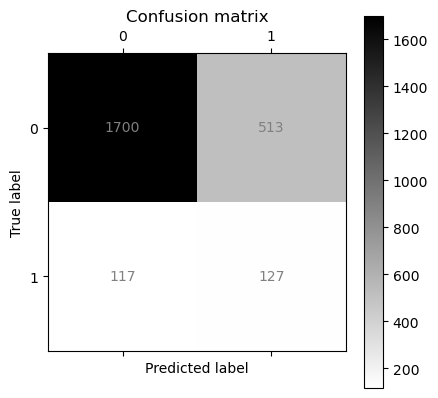

              precision    recall  f1-score   support

           0       0.94      0.77      0.84      2213
           1       0.20      0.52      0.29       244

    accuracy                           0.74      2457
   macro avg       0.57      0.64      0.57      2457
weighted avg       0.86      0.74      0.79      2457



In [7]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

cm = confusion_matrix(df_booleans["Biased"], df_booleans["Prediction_to_Boolean"])
plt.matshow(cm, cmap='binary')
plt.title('Confusion matrix')

# Add text annotations
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, str(cm[i, j]), ha='center', va='center', color='grey')

plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')

import os
if not os.path.exists("../../output/evaluation/mixtral_prompt_3"):
    os.makedirs("../../output/evaluation/mixtral_prompt_3")
plt.savefig("../../output/evaluation/mixtral_prompt_3/confusion_matrix.png")

plt.show()

print(classification_report(df_booleans["Biased"], df_booleans["Prediction_to_Boolean"]))



# save classification 
report = classification_report(df_booleans["Biased"], df_booleans["Prediction_to_Boolean"])
with open("../../output/evaluation/mixtral_prompt_3/classification_report.txt", "w") as file:
    file.write(report)
